<a href="https://colab.research.google.com/github/podilapujagadeesh/FMML-2023_PROJECTS_and_SUBMISSIONS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

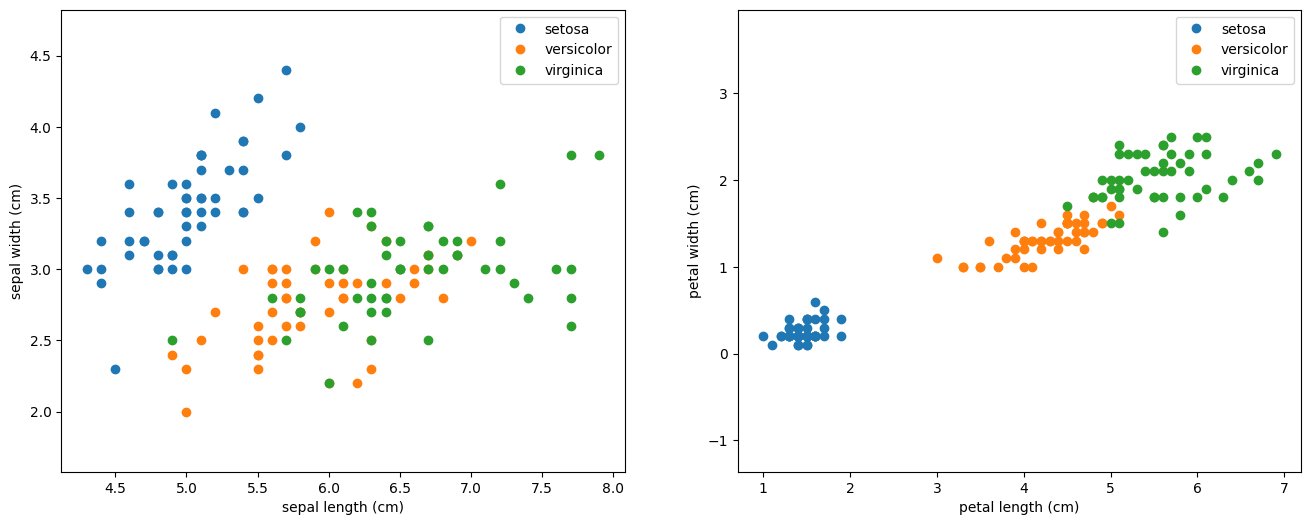

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 105.23it/s]


# Plot training progress

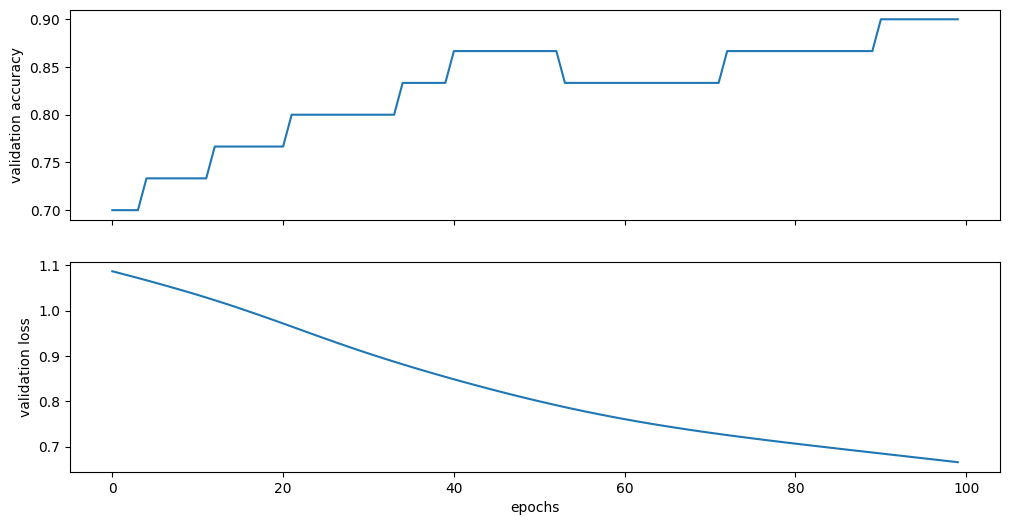

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");



1.ANSWER:Changing the number of hidden layers can affect the model's performance and training time. If you're training a neural network, adding more hidden layers can help the model learn more complex patterns in the data, potentially improving its performance. However, adding too many layers can also lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.
If you're working with a pre-trained model, like GPT-3.5, you generally can't change the number of hidden layers directly. The number of layers is a fixed part of the model architecture. If you need a model with a different number of layers, you would typically need to train a new model from scratch with the desired number of layers.
If you have a specific task or problem in mind, I can provide more tailored advice on how to approach it with the right model architecture.

2.ANSWER:Changing the number of neurons in the hidden layer can also impact the model's performance. Adding more neurons can increase the model's capacity to learn complex patterns in the data, potentially improving its performance. However, this can also lead to overfitting, especially if the model becomes too complex for the amount of available training data.
On the other hand, reducing the number of neurons can help prevent overfitting, but it may also limit the model's ability to learn complex patterns.
In practice, it's often a good idea to start with a moderate number of neurons and then adjust based on the model's performance on a validation dataset. This process, known as hyperparameter tuning, can help you find the right balance between model complexity and generalization to new data.

3.ANSWER:Changing the activation function in a neural network can also affect its performance. The choice of activation function can impact how well the model can learn and represent complex patterns in the data.
For example, the ReLU (Rectified Linear Unit) activation function is commonly used in hidden layers because it helps the model learn quickly and avoids some of the issues like the vanishing gradient problem. However, ReLU can also suffer from the "dying ReLU" problem, where neurons can become inactive and stop learning.
Other activation functions, such as sigmoid or tanh, have different properties and may be more suitable for certain types of problems or architectures. It's often a good idea to experiment with different activation functions to see which one works best for your specific task.